# INFO 2950 Project: NBA Player Performance and Salary

## Introduction
#### Background Information
Professional basketball is one of the most popular and widely watched sports in the United States, generating billions of dollars in revenue annually. Given its immense popularity, teams invest significant sums of money in their players each year. With such large financial commitments, it is crucial for teams to allocate their budgets wisely, ensuring that players are compensated fairly and appropriately based on their performance. 

The findings from our analysis have far-reaching implications. For example, sports bettors can use our insights to make more informed decisions when predicting player salaries based on performance metrics. Similarly, sports teams and data analysts can use our results to better assess how much to pay their players, ensuring their decisions are made from reliable data. 

Furthermore, aspiring professional basketball players can benefit from our analysis by setting realistic expectations for their potential earnings in specific positions. This can help them make informed decisions about a career as a professional basketball player. Overall, our analysis provides valuable insights with applications across sports betting, team management, and career planning, highlighting its broad utility and importance.

The sources we chose to extract our data came from the site Kaggle. From this site, we create two data sets from the information provided.
Acronym Key: PPG = Points per Game, APG = Assists per Game, RPG = Rebounds per Game, BPG = Blocks per Game, SPG = Steals per Game, TPG = Turnovers per Game

Based on our findings, we determined that at least one of the aforementioned variables had statistical significance on salary. Additionally, we concluded that a player's salary does not impact a team's performance and playoff chances. Our findings have far-reaching applications and are beneficial in a wide variety of situations, some of which including player salary decisions, league career exploration, and sports betting. 


#### Research Question(s)
1. What individual performance metrics (points, rebounds, assists, blocks, steals, turnovers) best predict an NBA player's salary?
2. How do NBA player salaries across a team impact team performance and playoff chances?

## Data Description and Cleaning

In order to analyze these research questions, we found two datasets from Kaggle. Our [first dataset](https://github.com/katejtli/info2950_project/blob/main/salaries.csv) includes NBA player salaries from the 1990-1991 season to the 2017-2018 season. Our [second dataset](https://github.com/katejtli/info2950_project/blob/main/stats.csv) includes NBA player performance metrics from the 1950-1951 season to the 2017-2018 season Our [third dataset](https://github.com/katejtli/info2950_project/blob/main/playoffs.csv) includes NBA playoff player statistics from every NBA playoffs.

Acronym Key: PPG = Points per Game, APG = Assists per Game, RPG = Rebounds per Game, BPG = Blocks per Game, SPG = Steals per Game, TPG = Turnovers per Game

#### Data Collection

The sources we used for our analysis stem from Kaggle. Google owns Kaggle which likely implies that Kaggle was funded by Google, both being reliable companies. 

The websites that we collected data from are from public domains. Since the performance statistics of NBA players can be recorded by anyone that keeps close track of the sport, there is not much in terms of private data or information when documenting player stats. The same can be said about player salaries, which are always publicly available. However, the referenced datasets from Kaggle utilizes submitted data from other data analysts, which could be formatted however the original analyst wanted. This means we would be using already processed data, which could have missing or duplicate information.

Since we are using data from an existing datasets (Kaggle Player Performance and Salaries), there was most likely preprocessing run on the datasets prior to collection. We will use these data to create two new datasets. One dataset selects 40 players with their stats per year from the beginning of the 2014-2015 season to the end of the 2023-2024 season. The other dataset contains those same players’ salaries over the same timeframe. We will use these two dataframes to further compare the two factors, and point out any trends and make predictions.
NBA officials and ESPN analysts collected the data for their future reference and comparison. All NBA players are very much aware that their data is collected after every game. The players can utilize the data to help improve their abilities and study their performances.


#### Data Cleaning


Our cleaned data sets can be found in this notebook: [Phase 2](http://localhost:8889/notebooks/Desktop/GitHub/info2950_project/Project%20Phase%202.ipynb)  \
The steps to our process for salaries_df, stats_df, playoffs are outlined as follows:
- salaries_df:
  - Remove irrelevant data columns that provide no use to our analysis
  - Rename the columns to more straightforward names
  - Only selected the players that had salaries listed between the years 2010-2017
  - Removed duplicate rows of players that experienced mid-season trading
  - Counted the number of players that played 8 times and named the data frame salaries_df
  - Performed inner join on players to include salaries of each player
- stats_df: 
  - Only added relevant columns to the stats_df
  - Rename the columns to more straightforward names
  - Only selected the players that played between the years 2010-2017
  - Removed duplicate rows of players
  - Filter the players who did not compete in all eight seasons
  - Joined salaries_df and stats_df to consolidate all the data into one dataframe
- playoffs:
  - Create and name the dataframe with just teams and playoff status
  - Select only the relevant columns from the original dataframe
  - Only select the seasons and teams from the playoffs from 2010-2017
  - Rename columns and resent indices
  - Join df and playoffs_df that has teams that made the playoffs each season

#### Import Python Packages and Datasets

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# load our datasets/csv files
salaries = pd.read_csv('cleaned_salaries_df.csv')
stats = pd.read_csv('cleaned_stats_df.csv')
df = pd.read_csv('cleaned_df.csv')
full_playoff_df = pd.read_csv('full_playoff_df.csv')

## Preregistration Statements
1. Higher numbers in the points, assists, rebounds, blocks, and steals categories corresponds to a higher salary while higher numbers in the turnovers category corresponds to a lower salary.
2. For a given season, teams that have higher average salary across its roster will more likely make the playoffs. 

## Data Analysis

### Preregistration Statement 1
Higher numbers in the points, assists, rebounds, blocks, and steals categories
corresponds to a higher salary while higher numbers in the turnovers category corresponds 
to a lower salary.

Null/boring hypothesis: None of the variables (PPG, APG, RPG, BPG, SPG, TPG) have any affect on salary.

* $H_{0}$: $\beta_{PPG}$ = $\beta_{AST}$ = $\beta_{RPG}$ = $\beta_{BPG}$ = $\beta_{SPG}$ = $\beta_{TPG}$ = 0

Alternative/spooky hypothesis: At least one of the variables (PPG, APG, RPG, BPG, SPG, TPG) has a significant affect on salary, meaning that one of the coefficients for variables is non-zero. 

* $H_{a}$: $\beta_{i}$ ≠ 0 for at least one of i = {PPG, APG, RPG, BPG, SPG, TPG}

Overview: All of the varying player performance metrics listed above are important indicators of any given player's value in the NBA. Points scored is the primary measurement of performance since points are what ultimately wins games, making players with high PPG valuable assets for a team. Similarly, assists and defensive efforts also reflect a player's ability to create scoring oppurtunities, also making them valuable assets for any team. Based on previous observation, some experts even believe that defensive metrics could be even more important that offensive metrics, even though offensive players have higher averaged salaries (Weisfeld). On the other hand, performance metrics such as turnovers indicate player ability to give up ball possesion to the opposing team, making them less valuable assets. To test our hypothesis, we will analyze the heteroskedasticity of our independent variables. If it is determined as heteroskedastic, then we will square root functions on our variables. This will be followed up with a multicolinearity check to see if any variables must be dropped. We will then train two OLS regression models, one for the raw player salaries and the other for the square root player salaries. Lastly, in order to analyze the fit of the model, we will analyze the train and test datasets. Regardless of whether we reject the null hypothesis or not, our analysis will offer insight on which player metrics are truly the most valuable in contract negotiations. These results will dig deep into how performance is monetized in the high stake environment of the NBA. 

#### Check for multivariable linear regression feasibility 
**Heteroskedasticity:** Before we created a linear regression model, we wanted to test for heteroskedasticity by visually analyzing the relationship between the independent variables (PPG, APG, RPG, BPG, SPG, TPG) and the dependent variable (salary). Therefore, we plotted the independent variables on the x-axis and the dependent variable on the y-axis to run this check. For us to dermine that heteroskedasticity is not a concern, the individual plots should show a random scatter of data points. If the plot is not random, we will need to perform the necessary transformations. 

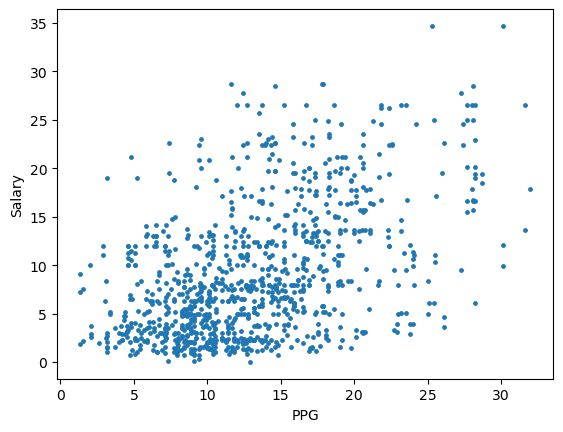

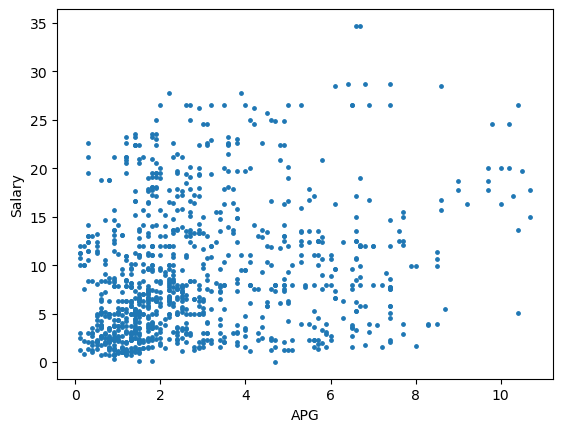

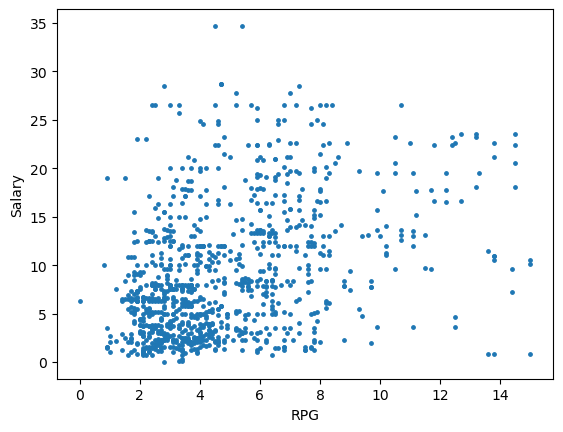

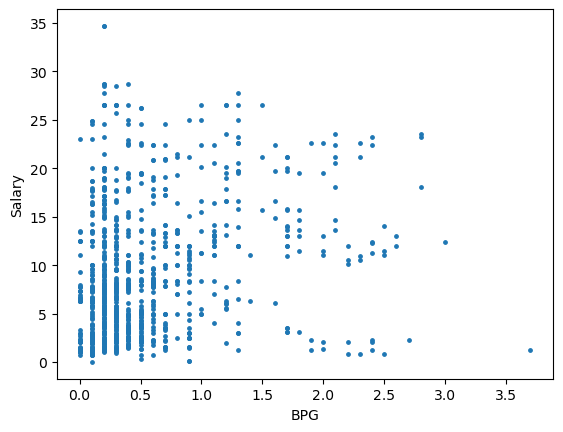

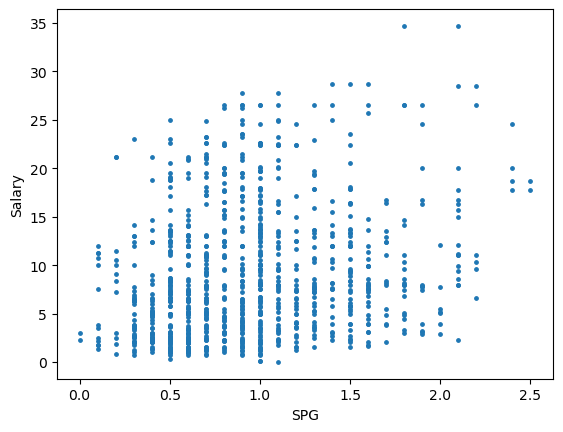

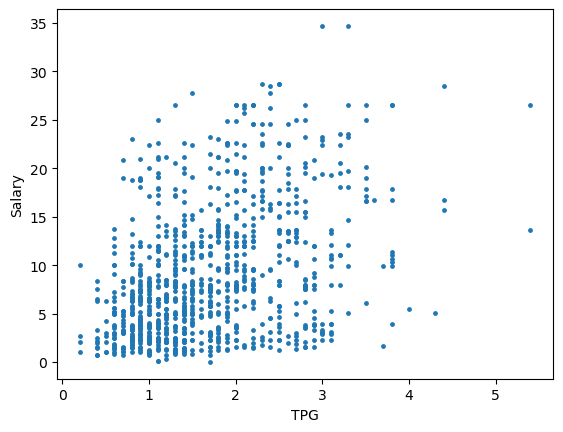

In [3]:
# check feasibility for linear regression by plotting the dependent and independent variables to check for pre-existing heteroskedasticity
sampled_df = df.sample(n = 1000, random_state = 2950)
categories = ['PPG', 'APG', 'RPG', 'BPG', 'SPG', 'TPG']

# create a scatter plot for each category so that the input `x` is one of the categories and the output `y` is salary
for c in df[categories]:
    plt.scatter(x = sampled_df[c], y = sampled_df['Salary'], marker = 'o', s = 6)
    plt.xlabel(c)
    plt.ylabel('Salary')
    plt.show()

**Pre-Model Heteroskedasticity Check Conclusions (Independent vs. Dependent Variables)**

The results of these scatterplots show that only SPG is randomly distributed against Salary. The other categories all have slight cone shapes, indicating slight heteroskedasticity. As a result, we transformed these variables by taking the square root of the independent and dependent variables and recreating the scatterplots to check for heteroskedasticity again.

We plotted the square root of PPG, APG, and RPG against the square root of Salary. We plotted the square root of BPG and TPG and the normal SPG against just Salary (we kept the plot for SPG the same).

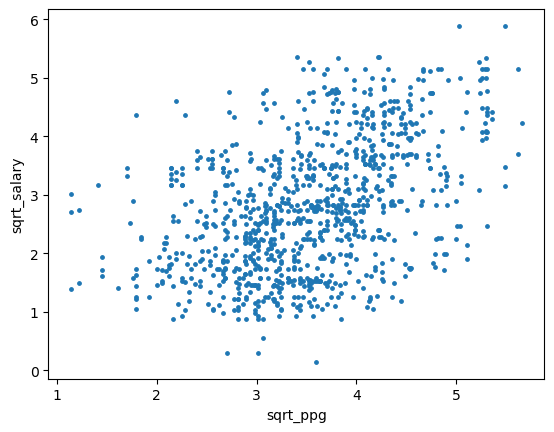

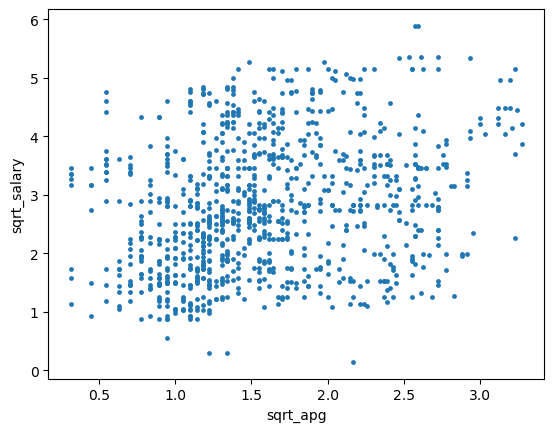

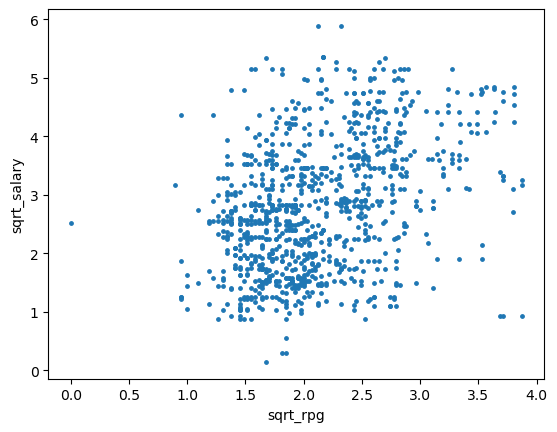

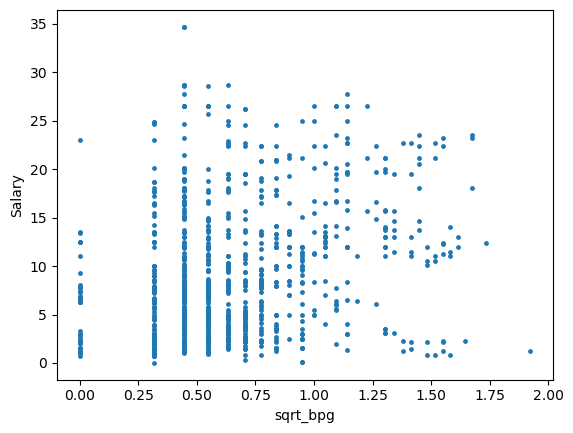

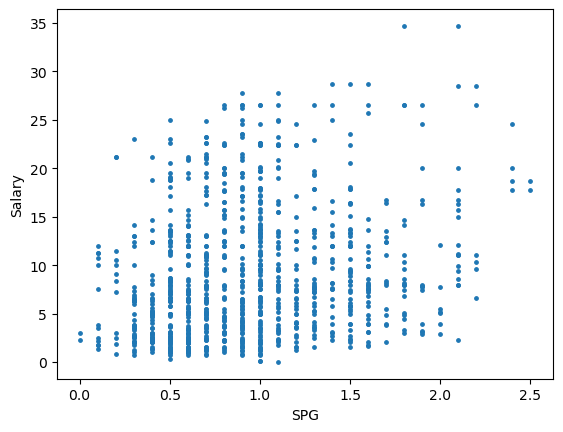

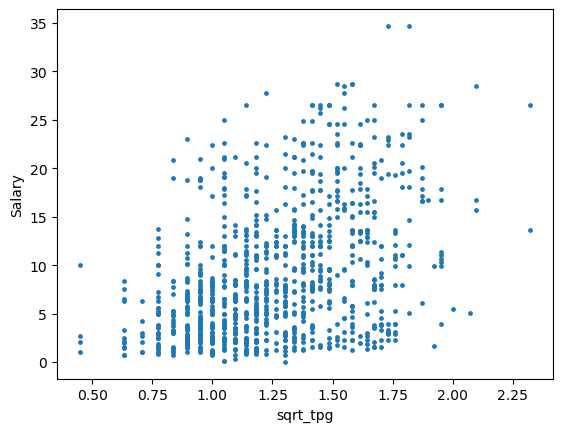

In [4]:
# perform a square root transformation on PPG, APG, RPG, BPG, TPG, and Salary
df['sqrt_ppg'] = np.sqrt(df['PPG'])
df['sqrt_apg'] = np.sqrt(df['APG'])
df['sqrt_rpg'] = np.sqrt(df['RPG'])
df['sqrt_bpg'] = np.sqrt(df['BPG'])
df['sqrt_tpg'] = np.sqrt(df['TPG'])
df['sqrt_salary'] = np.sqrt(df['Salary'])

# create a scatter plot for each category that underwent a square root transformation\n",
transform_sample = df.sample(n = 1000, random_state = 2950)

# here is a scatter plot for the transformations of PPG, APG, and RPG with the transformation of Salary\n",
categories_none_salary = ['sqrt_ppg', 'sqrt_apg', 'sqrt_rpg']

for n in df[categories_none_salary]:
    plt.scatter(x = transform_sample[n], y = transform_sample['sqrt_salary'], marker = 'o', s = 6)
    plt.xlabel(n)
    plt.ylabel('sqrt_salary')
    plt.show()

# here is a scatter plot for the square root transformations of BPG and TPG and the regular SPG without the transformation of Salary\n",
categories_w_salary = ['sqrt_bpg', 'SPG', 'sqrt_tpg']

for l in df[categories_w_salary]:
    plt.scatter(x = transform_sample[l], y = transform_sample['Salary'], marker = 'o', s = 6)
    plt.xlabel(l)
    plt.ylabel('Salary')
    plt.show()

After square root transformation, the independent and dependent variables have reduced heteroskedasticity, meaning the variance of data between the variables seem random. Plotting SPG and the other transformed variables against either the Salary or square root of Salary results in randomly distributed scatterplots, signaling no heteroskedasticity. We used visual analysis to determine if we should plot our transformed inputs against normal Salary or the transformed salary.

We then checked for multicollinearity to ensure that the performance metrics are not related to each other. 

**Multicollinearity:** 
We used a correlation matrix to check for multicollinearity between the PPG, APG, RPG, BPG, SPG, and TPG variables.

In [5]:
#check for multicollinearity between the (transformed) performance metrics,
mc = df[['sqrt_ppg', 'sqrt_apg', 'sqrt_rpg', 'sqrt_bpg', 'SPG', 'sqrt_tpg']]
mc.corr()

,sqrt_ppg,sqrt_apg,sqrt_rpg,sqrt_bpg,SPG,sqrt_tpg
sqrt_ppg,1.000000,0.556677,0.375741,0.118981,0.505669,0.769272
sqrt_apg,0.556677,1.000000,-0.088543,-0.297309,0.654107,0.782751
sqrt_rpg,0.375741,-0.088543,1.000000,0.696307,0.077652,0.293920
sqrt_bpg,0.118981,-0.297309,0.696307,1.000000,-0.079724,0.080762
SPG,0.505669,0.654107,0.077652,-0.079724,1.000000,0.613649
sqrt_tpg,0.769272,0.782751,0.293920,0.080762,0.613649,1.000000


**Multicollinearity Check Conclusions**
Since our variables are all aspects of basketball, we determined that there should be some correlation between the variables, but not excessive correlation. Looking at our correlation matrix, we noticed that none of the correlation coefficients between the values were particularly high. However, two correlation coefficients (between sqrt_tpg and sqrt_ppg is ~0.77, between sqrt_tpg and sqrt_apg is ~0.78) have relatively high. Analyzing our correlation coefficient matrix, we determined that PPG and APG both have higher correlation with the other variables. Also using our domain knowledge of basketball, we determined that players with higher PPG usually handle the ball more, leading to possibly higher TPG value. In addition, PPG and APG is usually more of predictor and more critical to salary than TPG.

TPG also has higher correlation with SPG with a value of ~0.61. Looking at our matrix, we see that TPG has more coefficients with higher absolute values, meaning that it is more closely correlated with the other variables. 

For these reasons, we decided to drop the variable TPG in our OLS regression model.

#### OLS Regression Model and F-Tests
When we were determining that heteroskedasticity and multicollinearity were no longer concerns, we had two different potential outputs for our OLS regression model: `Salary` or `sqrt_salary`. To determine which output would create better fitting model, we created two different OLS models that was fit on `categories` and either `salary` or `sqrt_salary`. We ran f-tests and observed the f-statistics and p-values to determine which model was better. Higher f-statistic and lower p-value meant a better model fit. We also used the coefficients of the variables and the p-values of the coefficients (t-tests) to decide if we could reject our null hypothesis or not. We could reject the null hypothesis if the p-values for the t-tests were less than 0.05. Rejecting the null hypothesis means that at least one of the predictors had significant impact on salary. Analyzing the coefficients for our predictors, we determined that a higher absolute value of the coefficient meant greater impact on salary.

We also wanted to eventually test the generalizeability of our superior model, so we started with splitting our df into a train and test set.

In [6]:
# Create a train-test split of 70%-30% to ensure our linear regression model generalizes well
train, test = train_test_split(df, test_size = 0.3, random_state = 2950)

In [7]:
# Train an OLS model on the train set with the input being `categories` and the output being salary
categories = ['sqrt_ppg', 'sqrt_apg', 'sqrt_rpg', 'sqrt_bpg', 'SPG']

X_train1 = sm.add_constant(train[categories])
y_train1 = train['Salary']
model_salary = sm.OLS(y_train1, X_train1).fit()
print(model_salary.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     287.9
Date:                Mon, 09 Dec 2024   Prob (F-statistic):          6.92e-257
Time:                        17:23:20   Log-Likelihood:                -10459.
No. Observations:                3360   AIC:                         2.093e+04
Df Residuals:                    3354   BIC:                         2.097e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.1438      0.489    -18.713      0.0

In [8]:
# Train an OLS model on the train set with the input being `categories` and the output being `sqrt_salary`
X_train2 = sm.add_constant(train[categories])
y_train2 = train['sqrt_salary']
model_sqrt = sm.OLS(y_train2, X_train2).fit()
print(model_sqrt.summary())

                            OLS Regression Results                            
Dep. Variable:            sqrt_salary   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     282.7
Date:                Mon, 09 Dec 2024   Prob (F-statistic):          6.00e-253
Time:                        17:23:20   Log-Likelihood:                -4452.1
No. Observations:                3360   AIC:                             8916.
Df Residuals:                    3354   BIC:                             8953.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2125      0.082     -2.599      0.0

**Model Interpretation:** Our first OLS model `model_salary` is trained with the input `x` being the categories from the train set and the output `y` being the Salary column from the train set. Our second OLS model `model_sqrt` is trained with the same input `x` as our first model but now our output `y` is the tranformed salary `sqrt_salary` column from the train set. After printing the summary for these two OLS models, we were able to analyze the coefficients of each variable and were able to run f-tests (and t-tests) to determine which model fit our data better.

1. `model_salary`
    * When Salary increases by 1.0 million, ...
        * sqrt_ppg increases by approximately 2.7 points.
        * sqrt_apg increases by approximately 1.7 assists.
        * sqrt_rpg increases by approximately 2.7 rebounds.
        * sqrt_bpg increases by approximately 1.4 blocks.
        * SPG decreases by approximately 0.8 steals.\n",
    * The f-statistic for this model is high (~287.9), and the p-value is extremely low (essentially 0). Since the p-value of the f-statistic is less than 0.05, we can reject our null hypothesis.
    * Looking at the t-tests and the coefficients, we determined that all the variables are statistically significant and have an affect Salary. The p-values of all variables are less than 0.05; therefore, we can reject our null hypothesis, which states that none of the variables have a relationship with Salary.

2. `model_sqrt`
    * When Salary increases by 1.0 million, ...
        * sqrt_ppg increases by approximately 0.4 points.
        * sqrt_apg increases by approximately 0.3 assists.
        * sqrt_rpg increases by approximately 0.5 rebounds.
        * sqrt_bpg increases by approximately 0.2 blocks.
        * SPG decreases by approximately 0.1 steals.
    * The f-statistic for this model is high (~282.7), and the p-value is also extremely low (essentially 0). Since the p-value of the f-statistic is less than 0.05, we can reject our null hypothesis.
    * Looking at the t-tests and the coefficients, we determined that all the variables are statistically significant and have an affect on sqrt_salary. The p-values of all variables are less than 0.05; therefore, we can still reject our null hypothesis which states that none of the variables have a relationship with Salary.
   
**Model Conclusion** We determined that `model_salary` is a better fit for our data because the f-statistic is higher and the p-value is lower. F-tests helped us determine if the independent variables in our model(s) are useful in determining and explaining the dependent variable. Higher f-statistics mean that our model generalizes better. Since the f-statistic for `model_salary` is higher than that of `model_sqrt`, we decided that `model_salary` is a more accurate model.

#### Generalizeability Test (RMSE and MAE)
To continue to explain this decision, we used `model_salary` to make predictions on our train and test sets. We then calculated the RMSE and MAE values for both the train and test sets using the `root_mean_squared_error` and `mean_absolute_error` functions from the `sklearn` library. The RMSE values of the train set should be similar to that of the test set. The MAE values of the train set should be similar to that of the test set. All of the RMSE and MAE values should be relatively low.

In [9]:
# use model_salary to make predictions for the train set based on the categories
train_predictions = model_salary.predict(X_train1)

# use model_salary to make predictions for the test set based on the categories
X_test = sm.add_constant(test[categories])
test_predictions = model_salary.predict(X_test)

# check the model's fit and generalizeability by calculating RMSE and MAE for both the train and test sets
train_rmse = root_mean_squared_error(y_true = y_train1, y_pred = train_predictions)
test_rmse = root_mean_squared_error(y_true = test['Salary'], y_pred = test_predictions)
print(f"Train RMSE: {round(train_rmse, 2)}")
print(f"Test RMSE: {round(test_rmse, 2)}")

train_mae = mean_absolute_error(y_true = y_train1, y_pred = train_predictions)
test_mae = mean_absolute_error(y_true = test['Salary'], y_pred = test_predictions)
print(f"Train MAE: {round(train_mae, 2)}")
print(f"Test MAE: {round(test_mae, 2)}")

Train RMSE: 5.44
Test RMSE: 5.67
Train MAE: 4.17
Test MAE: 4.38


**Generalizeability Conclusion:** The RMSE (root mean squared error) values for the train and test sets are similar. We calculated that the absolute difference in these values is approximately 4% which is very small. The MAE (mean absolute error) values for the train and test sets are very close. We calculated that the absolute difference in these values is approximately 5% which is also very small. These values indicate that our model `model_salary` is a good fit, meaning it generalizes well with no overfitting or underfitting. 

#### Summary (Preregistered Statement 1)
For our preregistered statement 1, we were able to reject our null hypothesis which stated that the coefficients of all of the variables were equal to each other and were 0, meaning that our variables had no impact on salary. Through our analysis, we were able to determine that at least one of the variables had statistical significance on salary.
1. We checked for heteroskedasticity and multicollinearity between our variables before training out OLS model. Our first heteroskedasticity check showed that PPG, APG, RPG, BPG, and TPG were not randomly distributed. We transformed these variables using a square root transformation. Using visual analysis, we plotted new scatterplots to check for heteroskedasticity with inputs being the transformed (or original) data and the output being either transformed salary (sqrt_salary) or normal salary. Checking for multicollinearity resulted in us removing the predictor TPG since it was collinear with several other predictors.
2. We trained two different OLS regression models, one with the output being normal `Salary` and another with the output being transformed salary `sqrt_salary`. Running f-tests, we determined that our first model with just Salary was a better fit. During this process, we were also able to analyze the t-statistics and p-values which led to us rejecting our null hypothesis. 
3. We calculated the RMSE and MAE of both the train and test sets to check for generalizeability and determined that our chosen model is a good fit and generalizes well based on the likeness of the RMSE and MAE values.

### Preregistration Statement 2
For a given season, teams that have higher average salary across its roster will more likely make the playoffs.

Null/boring hypothesis: A team's salary has no effect on the odds of that team making the playoffs. 

* $H_{0}$: $\beta_{avg \ salary}$ = 0

Alternative/spooky hypothesis: Higher average team salaries is related to an increase in the odds of that team making the playoffs. In other words, there is a positive relationship between average team salary and the team's odds of making the playoffs.

* $H_{a}$: $\beta_{avg \ salary}$ > 0

Overview: The relationship between a team's payroll and their success for that respective season is a highly discussed topic in sport economics/ analysis. It is commonly assumed that a higher team salary directly correlates to increased success. Teams with high spending caps will buy highly valued players in order to create "super teams" in hopes of winning championships (Leese). However, having all of the best players does not always directly relate to a season of success. Other factors such as coaching and team chemistry may have an equally big impact on the success of a team's season. We plan on testing to see whether high team salaries truly do have positive effects on playoff performance, or whether the relationship is not as prominent. In order to test this, we will train a logistic regression model using our independent variables (average team salary) and our dependent variable (playoff qualification). In order to make sure that our data is formatted correctly and reliable, we will convert the dataframe into tidy format for a better regression analysis. We will then perform Z-test to test the coefficient of the average team salary, followed by an odds ratio interpretation. Regardless of whether we reject the null hypothesis or not, our analysis will provide insight on whether allocating massive funds towards "super teams" is truly the key to a successful playoff run. Either outcome of our analysis will provide better understanding of effective financial strategies in the NBA. It will be interesting to see if buying raw player talent out performs team chemistry/coaching.

**Pre-Analysis Formatting** \
In order to train a Logistic Regression on the `full_playoff_df` dataframe, we first formatted it to a tidy format. This makes the dataset narrower and longer, condenses the dummy variables into one column, and provides a playoff status for each team each year. 


In [10]:
#converting data to tidy format will allow for easier logistic regression analysis
tidy_df = full_playoff_df.melt(
    id_vars=["Team", "TeamPlayoffsSalary"],  
    var_name="Year", 
    value_name="PlayoffStatus")

tidy_df['Year'] = tidy_df['Year'].astype(int)
print(tidy_df.head())

  Team  TeamPlayoffsSalary  Year  PlayoffStatus
0  ATL               190.9  2010              1
1  BOS               293.5  2010              1
2  BRK                77.6  2010              0
3  CHA               103.0  2010              1
4  CHI               140.2  2010              1


**Logistic Regression Training and Model** \
We trained a Logistic Regression with the new `tidy_df` dataframe, with `TeamPlayoffsSalary` as the input (X) and `PlayoffStatus` as the output (y). In other words, we modeled the probability of a team making the playoffs that year based on their average salary from the years 2010-2017. The probability ranged from 0 to 1, with 0 = not making the playoffs to 1 = making playoffs. 

In [23]:
#train a LogReg where input is team average salary per year and output is playoff status (1 = made playoffs, 0 = did not make playoffs)

X = tidy_df[['TeamPlayoffsSalary']]
y = tidy_df['PlayoffStatus']

# create a train-test split of 70%-30%
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3, random_state=2950)

# fit the LogReg with the new training model
model = LogisticRegression()
result = model.fit(X_train, y_train)

**Cross Validation (KFold)** \
We trained a K-fold cross validation test by splittin the datasets into **K** equal parts (6), and training and testing the model on each of these subsets. This model will provide an evaluation of our model performance by calculating the mean and standard deviation precision across the folds.


In [20]:
#KFold validator with 6 splits
kf = KFold(n_splits=6,\
shuffle=False, random_state=None)
cv = cross_val_score(model, X, y, cv=kf)

average_precision = cv.mean()
std_dev_precision = cv.std()

print(f"Mean precision: {average_precision:.2f}")
print(f"Std precision: {std_dev_precision:.2f}")
print(f"Cross-Validation Scores: {cv}")

Mean precision: 0.51
Std precision: 0.08
Cross-Validation Scores: [0.575 0.55  0.35  0.55  0.55  0.5  ]


**KFold Analysis:** 
The Mean precision of 0.51 indicates that our model has approximately a 51% probability of correctly predicting whether a team will make the playoffs based on team average salary. The model's standard deviation of 0.08 also suggests that there is a fair amount of variability across the folds. The 6 individual Cross-Validation Scores were mostly above the 50% range, with the execption of a weak 35% performance. Overall, this variability suggests that our model may need additional factors in order to improve mean precision results, and that average salary alone is not a highly reliable predictor.

**Logit Regression Model, Summary Table and Z Test** \
The Logit Regression summary table shows a variety of data in regards to the Logit Regression ran. Some significant information includes:
- Coefficients of the input variable `TeamPlayoffsSalary`: Used to observe strength and direction of relationship, in addition to calculating the Odds Ratio
- z-statistic: Used to determine the statistical significance, and if the variables have a meaningful association/one is likely to affect the other
- P values: Used to determine statistical significance, and if the null hypothesis can be rejected or not

In [22]:
X = tidy_df[['TeamPlayoffsSalary']] 
y = tidy_df['PlayoffStatus']

# Add a constant term for the intercept
X_const = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X_const)
result = logit_model.fit()

# Print the summary table
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.689711
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:          PlayoffStatus   No. Observations:                  240
Model:                          Logit   Df Residuals:                      238
Method:                           MLE   Df Model:                            1
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                0.001754
Time:                        17:34:39   Log-Likelihood:                -165.53
converged:                       True   LL-Null:                       -165.82
Covariance Type:            nonrobust   LLR p-value:                    0.4456
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3244      0.282      1.149      0.251      -0.229       0.878
TeamP

**Analysis** 

**Coefficient Interpretation:** Coefficients in Logistic Regressions represent the relationship between the input and the (binary) output. It shows how the log-odds of the outcome changes as the input increases its value. If the coefficient is above 0, it represents a positive relationship. If the coefficient is below 0, it represents a negative relationship. The closer the coefficient is to 0, the weaker the effect on the outcome's log-odds is.
In this case, for every 1 million dolllar increase in the average team salary, the chances of making the playoffs change very slightly (reduces odds by 0.0008). Since the coefficient turned out to be very close to 0, the average team salary has little influence on the chance a team makes the playoffs. These results go against the alternative hypothesis' explanation that higher team salaries increase the odds of making playoffs.

**Z-Statistic Interpretation:** 
In this model, we utilized a Z-test in order to find the statistical significance between `TeamPlayoffsSalary` and `PlayoffStatus`. While a T-test can also be used to find statistical significance, the Z-test is more primarily used in larger samples. Since this Logistic Regression is consisted of more than 200 observations, it would make more sense to use the Z-test.
The Z-Statistic can be used to compute the P-value, showing the significance between the input and output.

**P-Value Interpretation:** P-Values are used to valdate a hypothesis against data, with the value representing the probability that the observed data was obtained using the null hypothesis, the statement we are trying to reject. A lower P-value, typically lower than 0.05, means that the data is more statistically significant, and the null hypothesis can be rejected. 
The P-value for this data is relatively high, much higher than the 0.05 threshold to reject. Therefore, since the P-value > 0.05, we fail to reject the null hypothesis, meaning the variable `TeamPlayoffsSalary` does not have a relationship with `PlayoffStatus`

**Odds Ratio Calculation** \
We calculated the Odds Ratio by exponating the `TeamPlayoffSalary` coefficient obtained from the Logit Regression results. \
The Odds Ratio, similar to the coefficient, shows the strength and direction of a relationship between two variables. If the OR is greater than 1, it indicates an increase in odds. If the OR is smaller than 1, it indicates a decrease in odds. The closer the OR is to 1, the lesser the strength of the relationship. 

In [24]:
# calculate odds ratio using the coefficient
odds_ratio = np.exp(-0.0008)

print(f"Odds Ratio for Teams Avg Salary: {odds_ratio:.4f}")

Odds Ratio for Teams Avg Salary: 0.9992


**Odds Ratio Analysis:** 
In this case, since the Odds Ratio is 0.9992, a value very close to 1, it indicates that there is close to no effect on the odds of the output in the two-variable relationship. This means that the input `TeamPlayoffsSalary` has minimal effects on the odds of the output `PlayoffStatus` equalling 1. This aligns more with the null hypothesis, stating that the average salary has no effect on playoff odds, which along with the higher P-Value suggests there is little significance between the salary and playoff odds.

#### Summary (Preregistered Statement 2)
For our preregistered statement 2, we failed to reject our null hypothesis, which stated that the team's salary had no impact on the odds of a team making the playoffs, meaning that the salary had no effect on the probability of making playoffs. Through our analysis, we concluded that the significance did not meet the threshold value to be considered a meaningful relationship

We organized the dataframe into a tidy dataframe before running the logistic regression. 
We then trained a logistic regression model, with the input being the average salary per team from the years 2010-2017, and the output being the probability of the team making the playoffs. We also calculated the odds ratio for the relationship, and utilized a Z-test to find statistical significance.

Analyzing the coefficient, odds ratio, z-coefficient, and p-value, we concluded that the average team salary does not have a significant impact on the probability of making the playoffs, meaning we failed to reject the null hypothesis.

## Conclusions

For our first preregestration question, we ultimately reject the null hypothesis stating the points, assists, rebounds, blocks, and steals categories had no effect on player salary because we determined that at least one of the variables had statistical significance on salary. By checking for heteroskedasticity and multicollinearity, as well as transforming the variables, we were able to train two OLS regression models. Through the evaluation of coefficients and model performance using OLS regression, we found that a higher absolute value of a coefficient indicates a greater impact on salary. Our f-test confirmed a high f-statistic and low p-value. The high f-statistic suggests the independent variables have a stronger effect on variations in player salaries than other random factors and errors. The lower p-value suggests the relationship between the categories of player metrics are statistically significant. We decided to include all of the variables in our model except for predictor TPG due to its collinearity with other predictors, which would ultimately make it more difficult to determine how accurately that variable affects salary. Additionally, by calculating the RMSE and MAE, we determined that the model we chose generalized well based on the resulting values. With all of these conclusions considered, we rejected our null hypothesis. 


For our second preregestration question, we failed to reject the null hypothesis that a players salary does not impact a teams performance and playoff chances. We trained a Logistic regression model with the tidy_df dataframe and split the training set and test set. From the coefficients we found, it shows that the coefficient for the Logistic Regression is very close to 0, which indicates the average team salary cas little influence on the chance a team makes the playoffs, ultimately going against the alternative hypothesis. Our Z-test was used in order to find the significance between TeamPlayoffsSalary and PlayoffStatus. We determined that from the coefficient, for every 1 million dollar increase in the average team salary, the chance of making the playoffs change slightly. Additionally, the P-value is quite high, so we fail to reject the null hypothesis.

The findings from our study suggest significant outcomes from the results and can be applied to a wide variety of situations. With regards to the results from the first pre-registration statement, which concluded at least one of the variables has a significant effect on salary, we can analyze areas where people can benefit from this knowledge. 

- Player salary decisions
    - Due to the significant investments teams make into their players every year, allocating
      resources wisely is essential. The results from our analysis can help organizations make
      informed decisions more effectively. Decision-makers can determine which positions are more
      valuable based on which metrics the players tend to perform better in and who the highest
      performers are in each category. The decision-makers can prioritize players with the most
      beneficial metrics and ultimately build a strong roster within budget constraints. Using
      this information will help determine which players may yield the greatest return on
      investment. 
- Performance development and career exploration
    - For players already in the league, these results are significant because players can focus
      on developing the skills that are tied to higher salaries. Additionally, aspiring league
      players can make informed decisions about whether or not they want to join the league based
      on this information. They can determine what their realistic expected salary would be based
      on their current skill level. This can help people make informed decisions about whether or
      not they want to join the league. 
- Sports betting
    - In terms of sports betting, people can use our information to delve deeper into player
      stats to determine which attributes are associated with higher salaries. From there, they
      could analyze which players excel in those areas and place informed bets on potential
      salaries. While this is a less common form of sports betting, it highlights the versatility
      and wide range of applications of our study. 

Regarding preregistration statement 2, we failed to reject the null hypothesis, indicating that teams with a higher average salary are not more likely to make the playoffs. This is significant because it undermines the commonly assumed idea that higher team salary directly correlates to higher success and performance. Our findings demonstrate that teams with smaller salary caps are not necessarily disadvantaged against higher paying organizations, revealing salary is not the sole determinant of a team’s success. 

Additionally, these findings may help with scouting new talent for a team’s roster. In some cases focusing on developing a strong roster of players based on starting strength and potential for growth is more beneficial than focusing on how much to pay the player, perpetuating the success of the organization. This strategy allows for the team to be built without the influence of having to pay a certain salary to achieve success. Our results demonstrate the importance of having a variety of focuses when building and advancing the success of a team. Based on this, our results demonstrate the importance of having a variety of focuses when building and perpetuating the success of a team. 


## Limitations
A potential data limitation when analyzing this data is calculating a team’s average salary. A team’s salary is more susceptible to outliers because there are a small number of players on the team. If one person has a really high salary and one has a really low salary, that could skew the data. Outliers in the team salary could affect our prediction by causing errors in our logistic regression model.
Another potential data limitation arises when a player shifts from their usual position during a game. Players are often evaluated based on performance metrics tied to their primary position. However, if they play a different position, their statistics might vary significantly, which could impact predictions about their salary. Since our analysis does not account for performance differences associated with positional changes, this could lead to inaccuracies in assessing their value and contributions.

Another potential data limitation includes the effect of inflation on a player’s salary when comparing performance progression between seasons. When analyzing a player's salary from previous seasons and comparing it to their current salary, not taking into account inflation would fail to provide an accurate representation of how much a player's salary actually increased or decreased based on performance throughout the seasons. Since inflation changes the value of how much their salary is worth, it would not provide an accurate representation of any correlation between the two. To combat this, we would have to normalize the given data to achieve standardization.

Another limitation to consider is team salary caps. NBA revenue has increased through each decade so NBA teams have increasingly larger salary caps to use on contracts. Since salary caps have steadily increased, teams are able to write larger contracts for their players, meaning that player salaries increase naturally. This may be a limitation in our data because if we don’t take into account salary cap increase, we may see an average salary increase for all players, even if they played poorly. In these cases, a player’s performance and their salary would have a positive correlation, but it would be a result of team salary cap increase rather than better performance. 

Individual player salary caps have also changed (Max contracts have gotten dramatically bigger as the years go on). The salary cap from the 2014-2015 season, which was \\$63.065 million,  pales in comparison to the salary cap in the 2024- 2025 season, which is \\$140.588  million. This is a data limitation because it complicates our multivariable prediction analysis. Chris Paul, a future Hall-of-Famer, earned \\$21.47 million dollars in his 2015 NBA season, while Mikal Bridges earned \\$23.3 million in the 24-25 season. Chris Paul, a significantly better and higher ranked player earned less than Mikal Bridges, someone who would have probably only earned \\$10 million 10 years before. Given the inflation and change in NBA salary spending, it makes it tricky to create comparable graphs and prediction charts with the data. 


Another limitation is if a player got injured and missed a season. This would result in missing data in the time series. When we want to determine how a player’s performance and salary changes season to season, missing data from the time series will lead to inaccurate results when analyzing potential trends in the data. Making predictions based on the given information will also be negatively impacted. 

Failing to recognize the harms of the data could potentially have a significant impact on people. One area affected by these harms could be sports analytics. If a sports team hires a data analyst to review the data about players progression to determine what the salary should be for that season but they fail to take into account inflation, the analyst may provide the wrong salary recommendation for a player. This would result in the franchise paying a player a sum of money that may generate a financial burden to the program that outweighs the benefits the player provides to the team. ESPN sports commentators and analysts, who often discuss future contract agreements, may be mislead by these data limitations. 


People who participate in sports betting may also be negatively impacted by the limitation of players missing a season due to injury. If someone wants to bet on how a player performs in a game or season based on how well they've historically performed, a gap in the time data series would skew the results of the player’s performance and provide misleading information to the better. This would result in a person potentially losing money from faulty data.


Another limitation results from us dropping rows where the player was listed twice in one year but with different teams. This means that we did not take into account mid-season trading and only considered a player's performance metrics from the first team they were on at the beginning of the season. This can affect the data output, because in some cases, if a player was traded in a season, we only are considering their stats that season up until they were traded.


## Ackowledgements and Bibliography
- These are the datasets we used in order to collect and compile our dataframes
  - https://www.kaggle.com/datasets/drgilermo/nba-players-stats?select=Seasons_Stats.csv
  - https://www.kaggle.com/datasets/whitefero/nba-player-salary-19902017
  - https://www.kaggle.com/datasets/robertsunderhaft/nba-playoffs?resource=download
 
- References
  - Leese, Danny. “Quantifying NBA Player Chemistry.” Medium, The Sports Scientist, 9 June 2020, medium.com/the-sports-scientist/quantifying-nba-player-chemistry-d6c4fa8f016e.
  - Weisfeld, Oren. “‘Defense Is a Lost Art’: Has the NBA’s Offensive Explosion Gone Too Far?” The Guardian, Guardian News and Media, 3 Feb. 2023, www.theguardian.com/sport/2023/feb/03/nba-offensive-revolution-scoring-defense. 
